In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from math import factorial
# import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

import math
import itertools

In [2]:
# In the following code, G is a networkx Graph

def get_nodes(G) :
    return list(G.nodes)

def get_edges(G) :
    return list(G.edges)

def get_simplices(G, d=None) :
    
    """Return list of all d-simplices"""
    
    all_simplices = list(nx.enumerate_all_cliques(G))
    
    if d==None:
        return [tuple(sorted(simplex)) for simplex in all_simplices]
    else :
        return [tuple(sorted(simplex)) for simplex in all_simplices if len(simplex)==d+1]
    
def get_max_simplices(G, d=None) :
    
    """Return list of all maximal simplices"""
    
    max_simplices = list(nx.find_cliques(G))
    
    if d==None :
        return [tuple(sorted(simplex)) for simplex in max_simplices]
    else : 
        return [tuple(sorted(simplex)) for simplex in max_simplices if len(simplex)==d+1]
    
def get_highest_order(G) :
    
    """Return d of largest d-simplex"""
    maximal_simplices = list(nx.find_cliques(G))
    sizes = [len(simplex) for simplex in maximal_simplices]
    return max(sizes) - 1


In [3]:
def plot_simplicial(G, ax=None, pos=None, params=None, projected=False) :
    
    """
    Plot simplicial complex built from networkx Graph G, by promoting cliques to simplices
    
    Parameters
    -----------
    
    G : networkx Graph
    
    ax : matplotlib.pyplot.axes 
        If None (default), current axes
    
    pos : dict 
        Dictionary of positions d:(x,y) is used for placing the 0-simplices.
        If None (default), nx.nx_agraph.pygraphviz_layout() is used.
            
    params : dict 
        Dictionary of parameters to plot, such as node colour etc (see networkx.draw)
        
    projected : bool
        If True, draw graph without higher-order simplices
        
    Return
    ------
    
    None
    
    """
    
    # 0-simplices
    nodes = get_nodes(G)
    # 1-simplices
    edges = get_edges(G)
    # 2-simplices 
    triangles = get_simplices(G, d=2)
    # 2-simplices (maximal)
    triangles_max = get_max_simplices(G, d=2)
    # max simplicial order
    d_max = get_highest_order(G)
    
    if ax==None:
        ax = plt.gca()    
        
    if pos==None:
        pos = nx.nx_agraph.pygraphviz_layout(G)
    
    if params==None :
        params =  {
#             'with_labels': True,
            'node_color': 'k',
            'edge_color': 'C0', 
            'width' : 2,
            'font_color': 'k',
            'node_size' : 100
          }

    # draw nodes
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, **params)
    # draw edges
    nx.draw_networkx_edges(G, pos=pos, ax=ax, **params)
    # draw triangles
    
    if not projected : # draw higher-order simplices
        
        for triangle in triangles: # or triangles
            (i, j, k) = triangle
            (x0, y0) = pos[i]
            (x1, y1) = pos[j]
            (x2, y2) = pos[k]

            if triangle in triangles_max :
                fc = 'C1'
                zorder = -3
                alpha = 0.4
            else: 
                fc = 'k'
                zorder = -2
                alpha = 0.1 # change if need all polygons

            tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
                              facecolor = fc,
                              zorder=zorder, alpha=alpha, lw=0.5)
            ax.add_patch(tri)
        
    # possibly draw d-simplex as d-polygone, but no 3d effect, very flat
#     for simplex in get_max_simplices(G,3) :
        
#         d = 3
#         x = [None]*(d+1)
#         y = [None]*(d+1)
        
#         vertices = []
#         for i in range(d+1) :
#             (x[i], y[i]) = pos[i]
#             vertices.append([x[i], y[i]])
                
#         # compute centroid
#         cent = (sum([v[0] for v in vertices]) / len(vertices), sum([v[1] for v in vertices]) / len(vertices))
#         # sort by polar angle
#         vertices.sort(key=lambda v: math.atan2(v[1] - cent[1], v[0] - cent[0]))
                
#         d_simplex = plt.Polygon(vertices,
#                           facecolor = "violet",
#                           zorder = -2, alpha=0.5, lw=0.5)
#         ax.add_patch(d_simplex)
        
    return ax

def plot_simplicial_pure(G, d, ax=None, pos=None, params=None) :
    
    """
    Plot simplicies of order d only, from the simplicial complex built from networkx Graph G, 
    by promoting cliques to simplices
    
    Parameters
    -----------
    
    G : networkx Graph
    
    d : int
        Draw nodes and simplices of order d only
    
    ax : matplotlib.pyplot.axes 
        If None (default), current axes
    
    pos : dict 
        Dictionary of positions d:(x,y) is used for placing the 0-simplices.
        If None (default), nx.nx_agraph.pygraphviz_layout() is used.
            
    params : dict 
        Dictionary of parameters to plot, such as node colour etc (see networkx.draw)
        
    Return
    ------
    
    None
    
    """
    
    # max simplicial order
    d_max = get_highest_order(G)
    
    if d > d_max :
        print("There is no d-simplex or higher in the network.")
        print("Try a smaller d.")
        
    simplices = get_simplices(G, d=d)
    # 0-simplices
    nodes = get_nodes(G)
    
    if ax==None:
        ax = plt.gca()    
        
    if pos==None:
        pos = nx.nx_agraph.pygraphviz_layout(G)
    
    if params==None :
        params =  {
#             'with_labels': True,
            'node_color': 'k',
            'edge_color': 'C0', 
            'width' : 2,
            'font_color': 'k',
            'node_size' : 100
          }

    # draw nodes
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, zorder=-2, **params)
    
    if d==1 : 
        # draw edges
        nx.draw_networkx_edges(G, pos=pos, ax=ax, zorder=-3, **params)
        ax.set_rasterization_zorder(-2)
    elif d==2 :
        triangles = simplices
        patches = []

        # draw triangles
        for triangle in triangles:
            (i, j, k) = triangle
            (x0, y0) = pos[i]
            (x1, y1) = pos[j]
            (x2, y2) = pos[k]
            
            tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
                              facecolor = 'C1',
                              zorder=-4, alpha=0.4, lw=0.5)
#             ax.add_patch(tri)
            patches.append(tri)
    
            edge_list = list(itertools.combinations(triangle, 2))
            nx.draw_networkx_edges(G, edgelist=edge_list, pos=pos, ax=ax, zorder=-3, edge_color=f'C1', lw=0.5)
        
        p = PatchCollection(patches, facecolor = f'C1',
                                  zorder=-4, alpha=0.4, lw=0.5)
        ax.add_collection(p)
        ax.set_rasterization_zorder(-2)

    elif d>=3 :
        
#         patches = []
        
#         for simplex in simplices :
#             for triangle in itertools.combinations(simplex, 3) :
#                 (i, j, k) = triangle
#                 (x0, y0) = pos[i]
#                 (x1, y1) = pos[j]
#                 (x2, y2) = pos[k]

#                 tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
#                                   facecolor = f'C{d-1}',
#                                   zorder=-2, alpha=0.4, lw=0.5)
#                 patches.append(tri)
            
#             edge_list = list(itertools.combinations(simplex, 2))
#             nx.draw_networkx_edges(G, edgelist=edge_list, pos=pos, ax=ax, edge_color=f'C{d-1}', lw=0.5, zorder=-3)

#         p = PatchCollection(patches, facecolor = f'C{d-1}',
#                                   zorder=-2, alpha=0.4, lw=0.5)
#         ax.add_collection(p)
        
#         possibly draw d-simplex as d-polygone, but no 3d effect, very flat
        patches = []

        for simplex in get_simplices(G, d) :

            x = [None]*(d+1)
            y = [None]*(d+1)

            vertices = []
            for i, node in enumerate(simplex): #in range(d+1) :
                (x[i], y[i]) = pos[node]
                vertices.append([x[i], y[i]])

            # compute centroid
            cent = (sum([v[0] for v in vertices]) / len(vertices), sum([v[1] for v in vertices]) / len(vertices))
            # sort by polar angle
            vertices.sort(key=lambda v: math.atan2(v[1] - cent[1], v[0] - cent[0]))

            d_simplex = plt.Polygon(vertices,
                              facecolor = "violet",
                              zorder = -4, alpha=0.5, lw=0.5)
            patches.append(d_simplex)
            
            edge_list = list(itertools.combinations(simplex, 2))
            nx.draw_networkx_edges(G, edgelist=edge_list, pos=pos, ax=ax, edge_color=f'C{d-1}', lw=0.5, zorder=-3)

        p = PatchCollection(patches, facecolor = f'C{d-1}',
                                  zorder=-4, alpha=0.4, lw=0.5)
        ax.add_collection(p)
        ax.set_rasterization_zorder(-2)
#             ax.add_patch(d_simplex)
        
    return

def plot_hist_num_simplices(G, ax=None, color='black') :
    
    if ax==None: 
        ax = plt.gca()
    
    d_max = get_highest_order(G)
    x = range(1,d_max+1)
    heights = []
    
    for d in range(1, d_max+1) :
    
        n_simplices_d = len(get_simplices(G, d=d))
        heights.append(n_simplices_d)
        
    ax.set_xticks(x)
    ax.set_xlabel("order $d$")
    ax.set_ylabel("# of $d$-simplices")
        
    ax.bar(x, heights, color=color)
    
    return ax


## Draw

In [35]:
G = nx.erdos_renyi_graph(n=10, p=0.5)

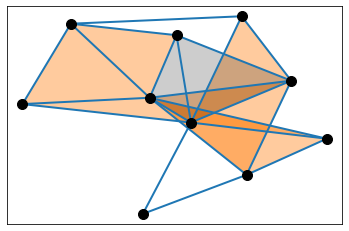

In [36]:
plot_simplicial(G)
plt.show()

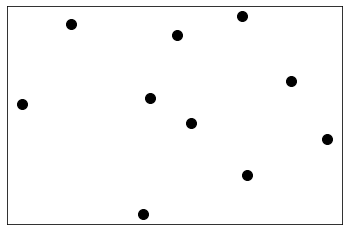

In [37]:
plot_simplicial_pure(G, d=0)
plt.show()

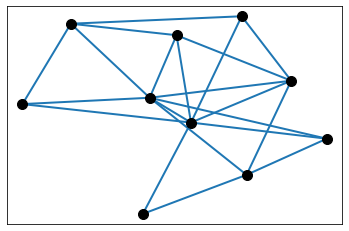

In [38]:
plot_simplicial_pure(G, d=1)
plt.show()

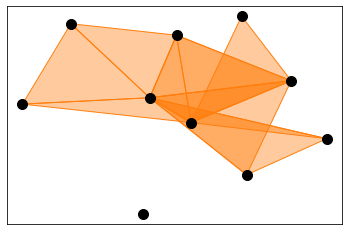

In [39]:
plot_simplicial_pure(G, d=2)
plt.show()

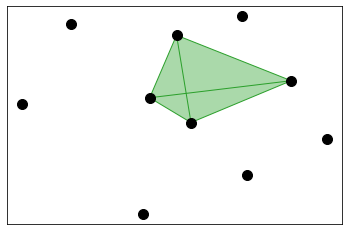

In [40]:
plot_simplicial_pure(G, d=3)
plt.show()

There is no d-simplex or higher in the network.
Try a smaller d.


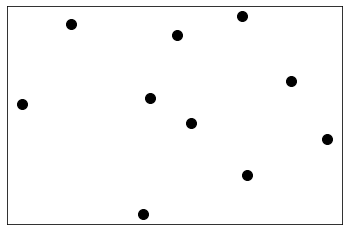

In [41]:
plot_simplicial_pure(G, d=4)
plt.show()

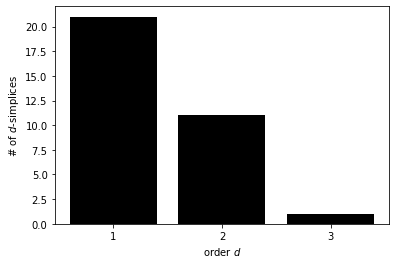

In [42]:
plot_hist_num_simplices(G)
plt.show()